TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
text = ['Hello']

In [264]:
vect = TfidfVectorizer()

In [265]:
vect.fit(text)

TfidfVectorizer()

In [266]:
## TF will count the frequency of word in each document. and IDF 
print(vect.idf_)

[1.]


In [267]:
print(vect.vocabulary_)

{'hello': 0}


A words which is present in all the data, it will have low IDF value. With this unique words will be highlighted using the Max IDF values.

In [268]:
example = text[0]
example

'Hello'

In [269]:
example = vect.transform([example])
print(example.toarray())

[[1.]]


Here, 0 is present in the which indexed word, which is not available in given sentence.

Passive: if correct classification, keep the model;
Aggressive: if incorrect classification, update to adjust to this misclassified example.

In [270]:
import pandas as pd

In [271]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [272]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shamykhanovalaura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [273]:
x = dataframe['text']
y = dataframe['label']

In [274]:
x

0       Daniel Greenfield, Shillman Journalism Fellow ...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary State John F. Kerry said Monday...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day New York front-runners Hillar...
                              ...                        
6330    The State Department told Republican National ...
6331    The ‘P’ PBS Should Stand ‘Plutocratic’ ‘Pentag...
6332    Anti-Trump Protesters Are Tools Oligarchy Ref...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [275]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [278]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [279]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


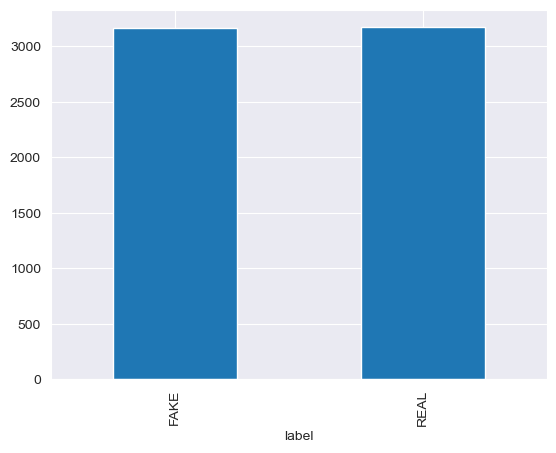

In [280]:
print(dataframe.groupby(['label'])['text'].count())
dataframe.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

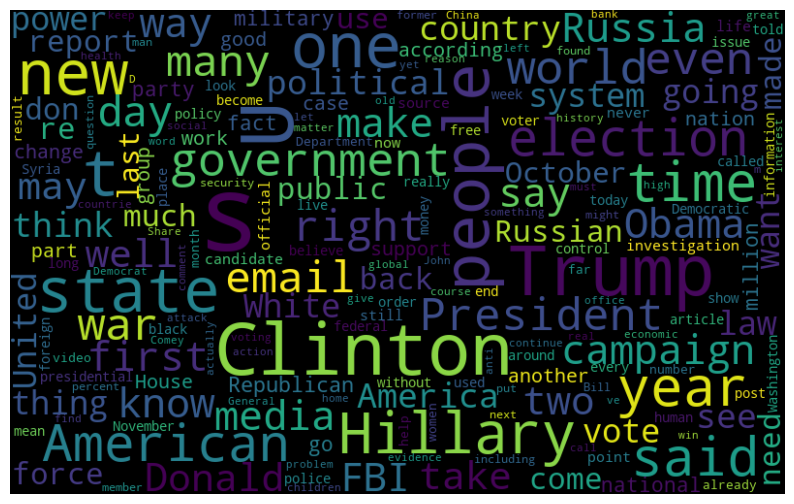

In [281]:
from wordcloud import WordCloud
fake_data = dataframe[dataframe["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

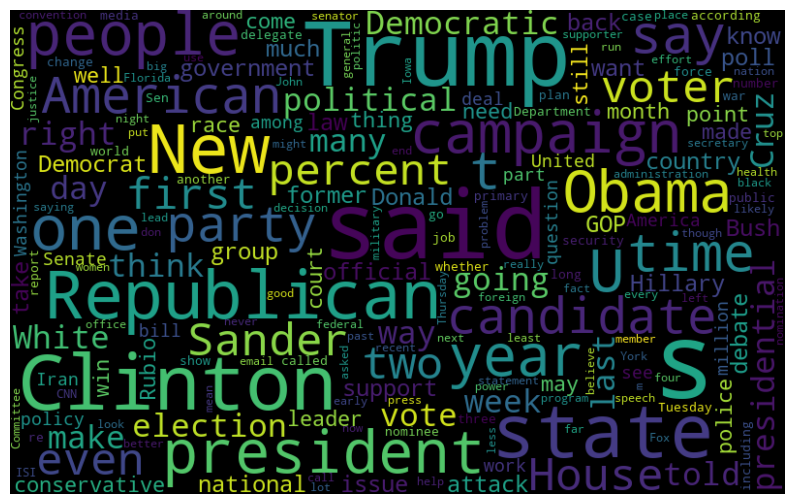

In [282]:
fake_data = dataframe[dataframe["label"] == "REAL"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

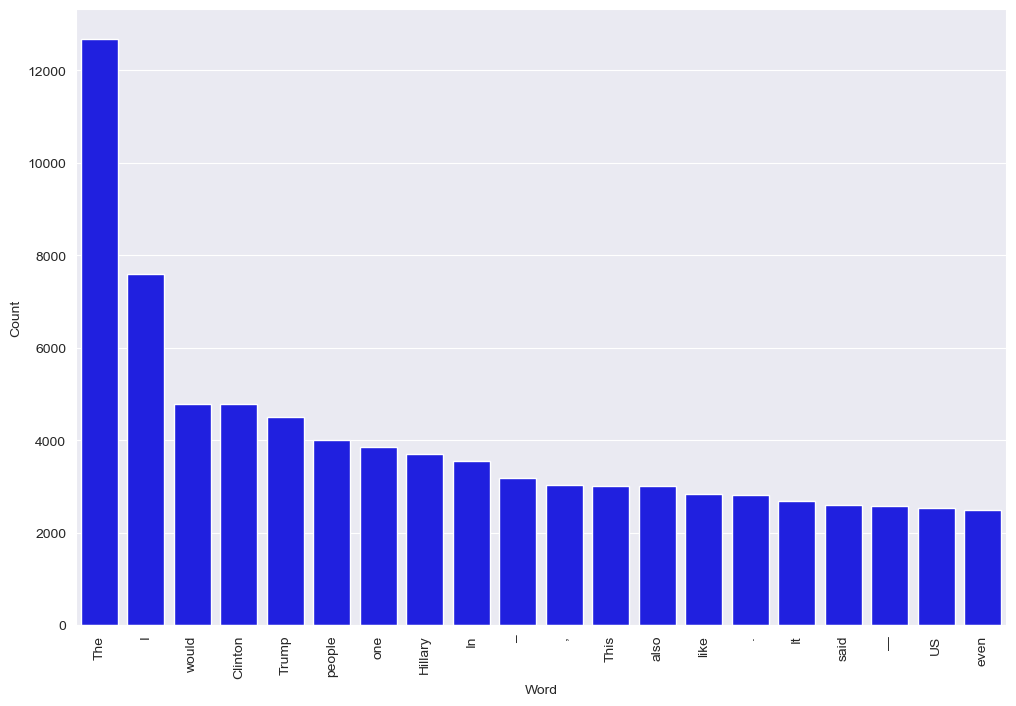

In [283]:
import nltk
from nltk import tokenize
import seaborn as sns

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

counter(dataframe[dataframe["label"] == "FAKE"], "text", 20)

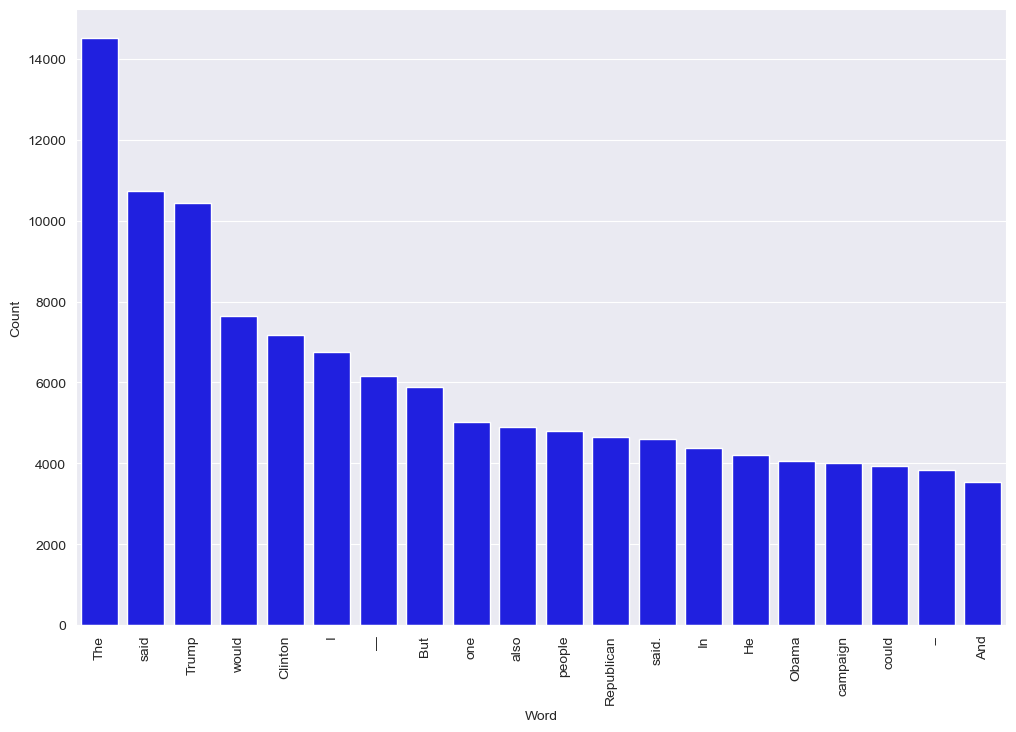

In [284]:
counter(dataframe[dataframe["label"] == "REAL"], "text", 20)

In [285]:
dct = dict()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB

NB_classifier = BernoulliNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.74%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=0))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

In [293]:
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC() # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.05%


In [297]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(y_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 48.54%


([<matplotlib.axis.YTick at 0x7fc29eff8e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

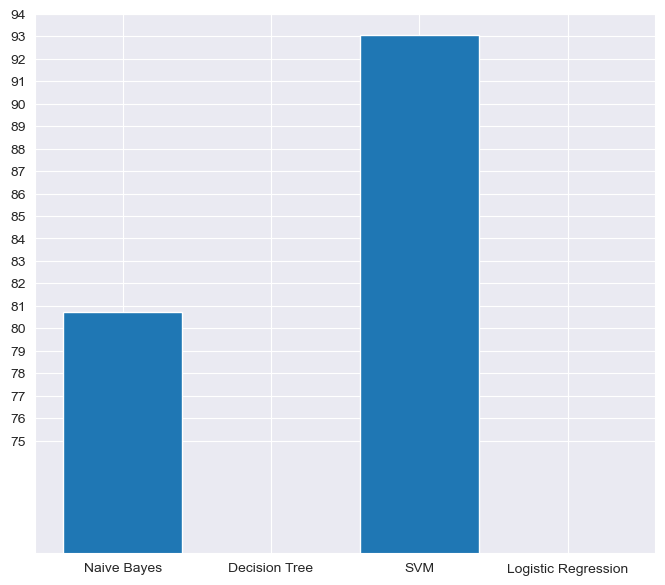

In [305]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(70,80)
yticks = np.arange(75, 95)
plt.yticks(yticks)

* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

In [306]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(tfid_x_train,y_train)

SVC()

In [309]:
y_pred = classifier.predict(tfid_x_test)

In [310]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[575  40]
 [ 53 599]]
Confusion matrix, without normalization


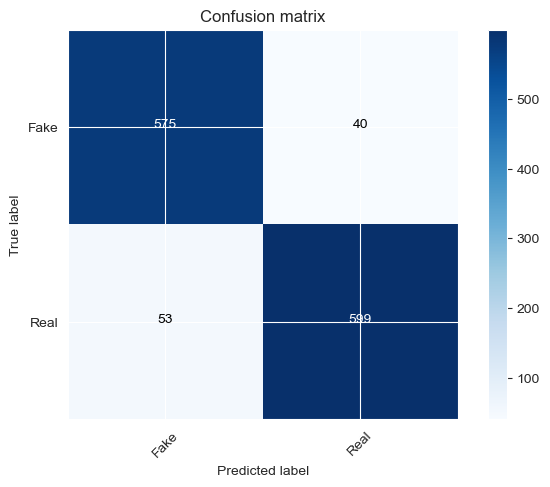

In [311]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
plot_confusion_matrix(cf, classes=['Fake', 'Real'])

In [314]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [315]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [316]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [317]:
import pickle
pickle.dump(clf,open('/Users/shamykhanovalaura/Desktop/Fake_News_Detection-master/model.pkl', 'wb'))

In [318]:
# load the model from disk
loaded_model = pickle.load(open('/Users/shamykhanovalaura/Desktop/Fake_News_Detection-master/model.pkl', 'rb'))